In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [934]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit

from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer
import matplotlib.colors as plt_colors

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve


from sklearn.metrics import classification_report


### Область работы 2 (поиск  модели .... )

In [1126]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv'# содержит только имя файла, без имен папок !!!
path_test='test.csv'


In [1127]:
train=pd.read_csv(path_train)
test=pd.read_csv(path_test)

In [966]:
train['quality']=train['quality'].apply(lambda x: 1 if x >= 7 else 0)
train1=train[train['quality']==0]
train2=train[train['quality']==1]

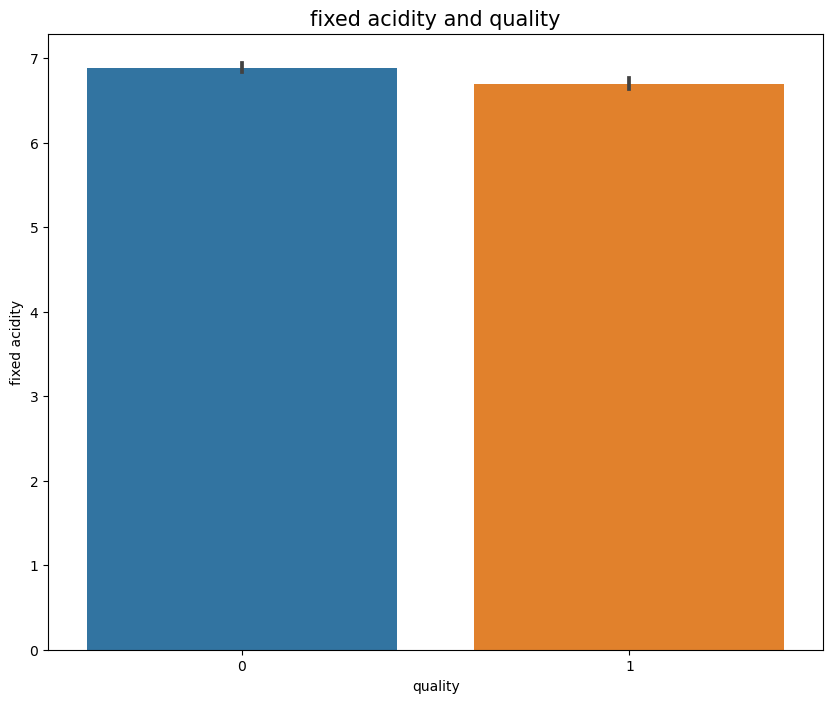

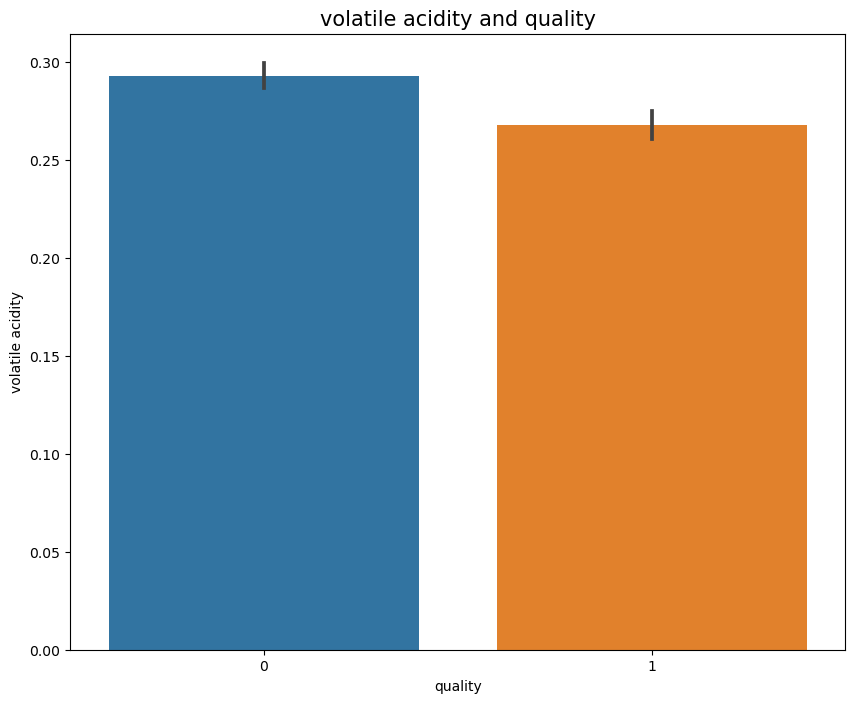

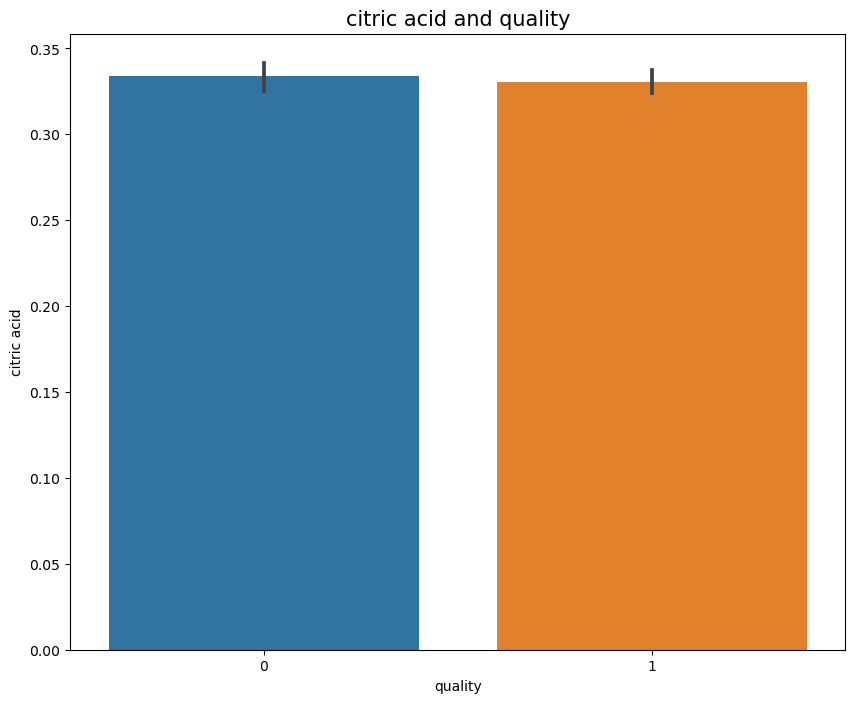

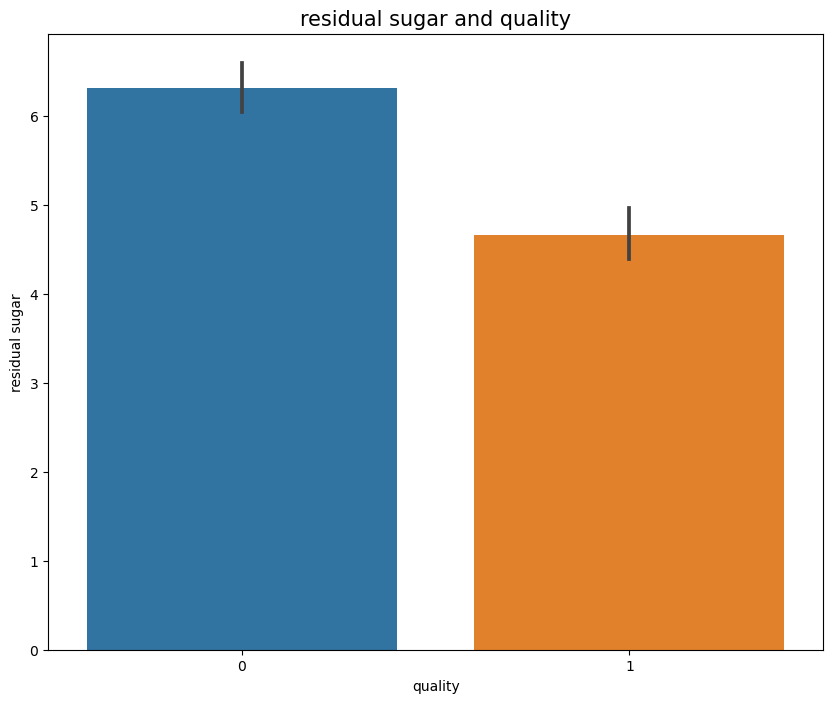

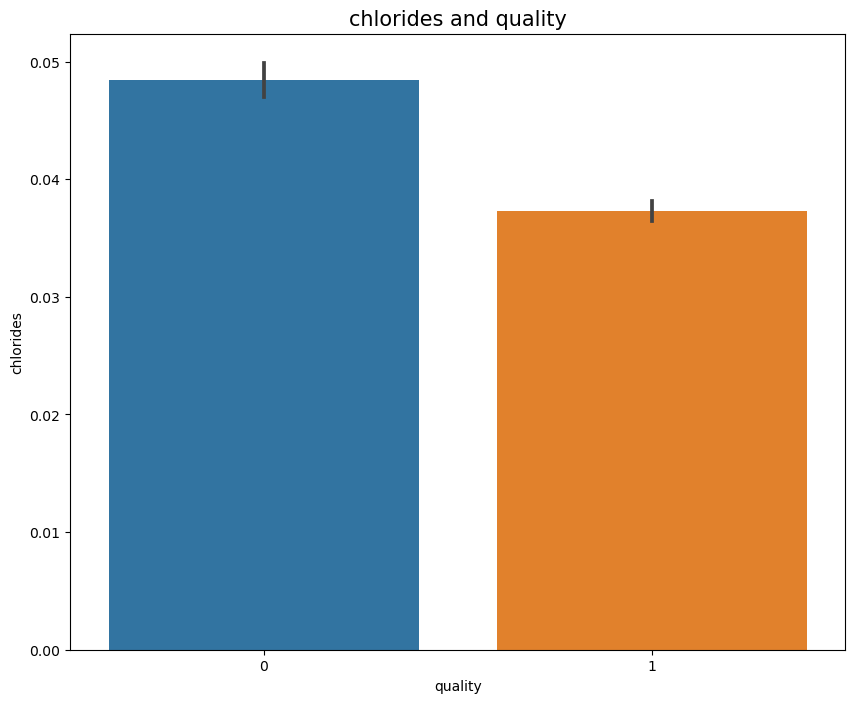

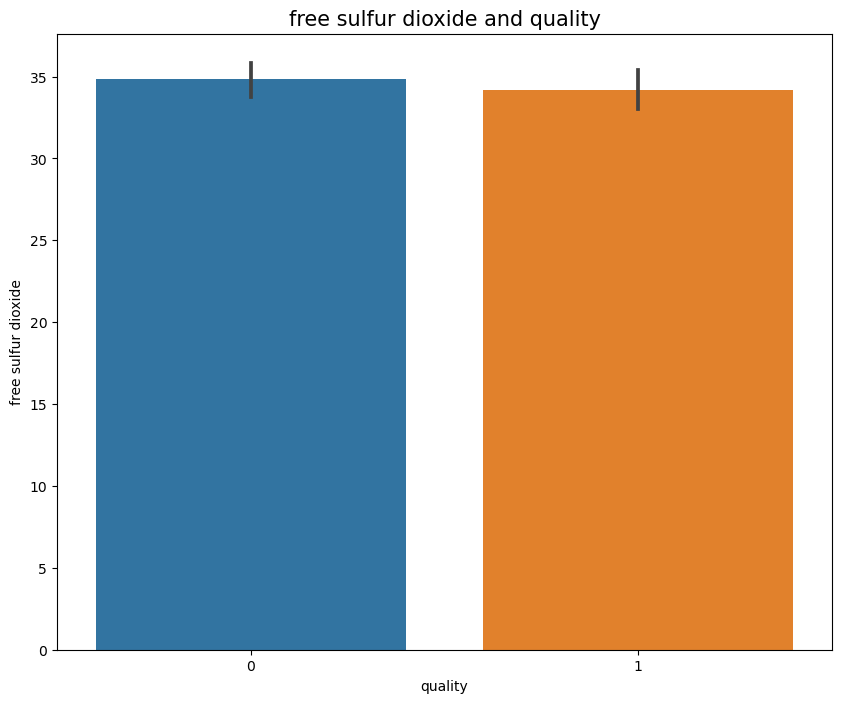

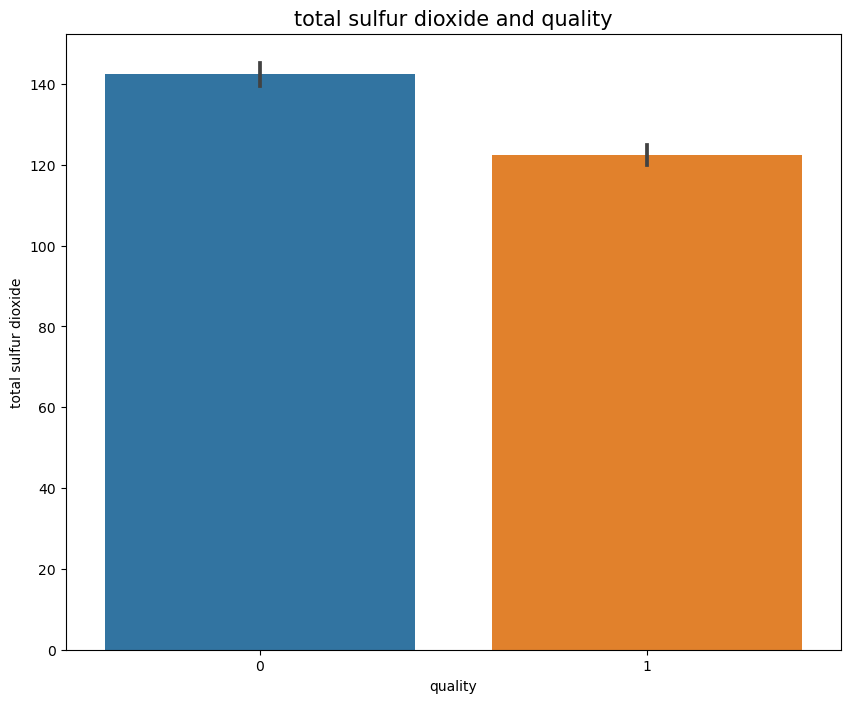

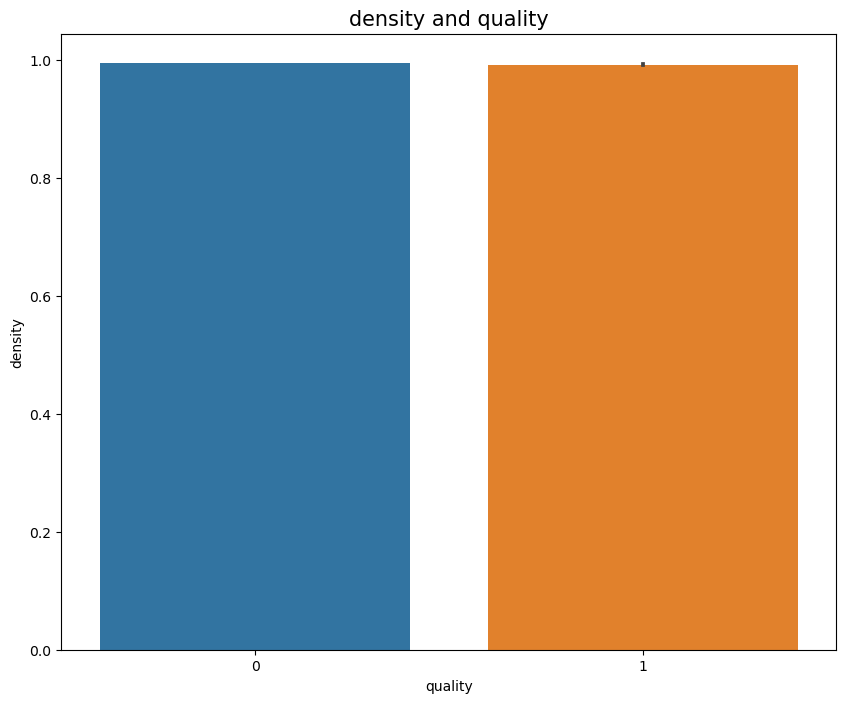

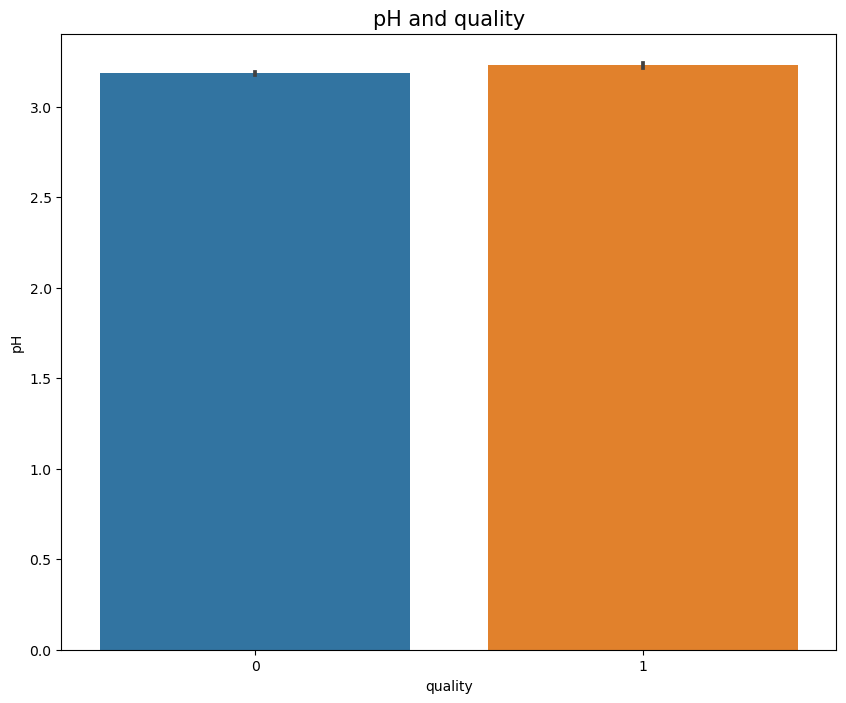

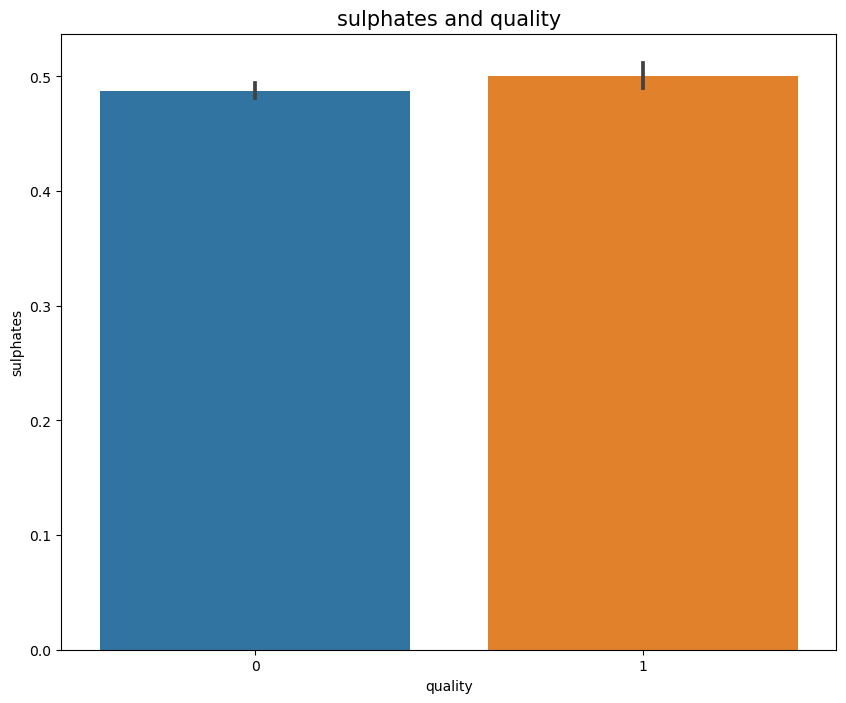

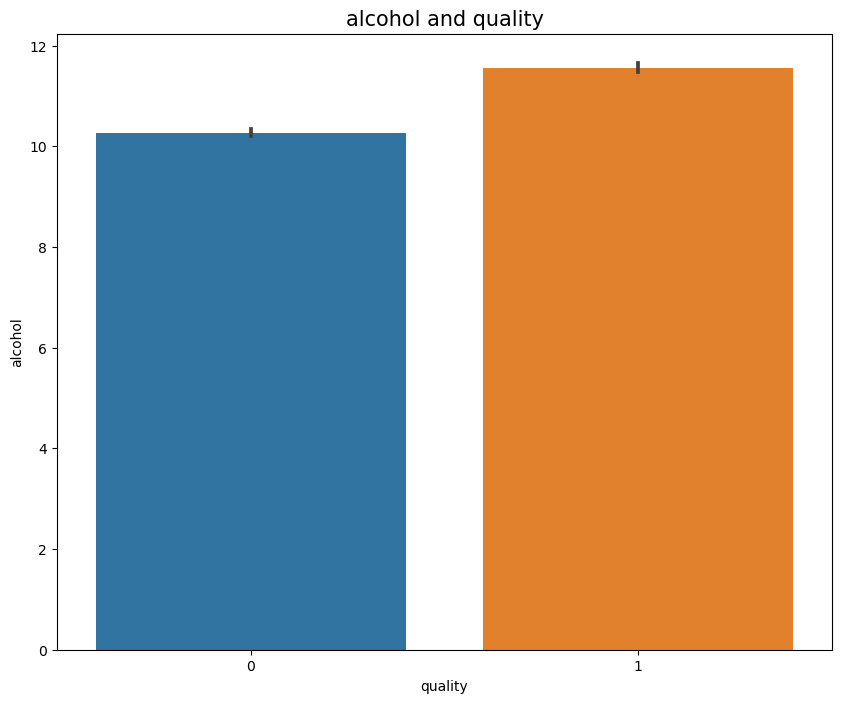

In [967]:
for col in train.drop("quality", axis=1).columns:
    plt.figure(figsize=(10,8))
    sns.barplot(x=train["quality"], y=train[col])
    plt.title(f"{col} and quality", size=15)
    plt.show()

Видно,что нет какого-то сильного влияния какого-то признака на классы 0 и 1

In [901]:
y_train=y_train.apply(lambda x: 1 if x >= 7 else 0)
y_test=y_test.apply(lambda x: 1 if x >= 7 else 0)

In [1103]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('quality',axis=1), train.quality, random_state=42)

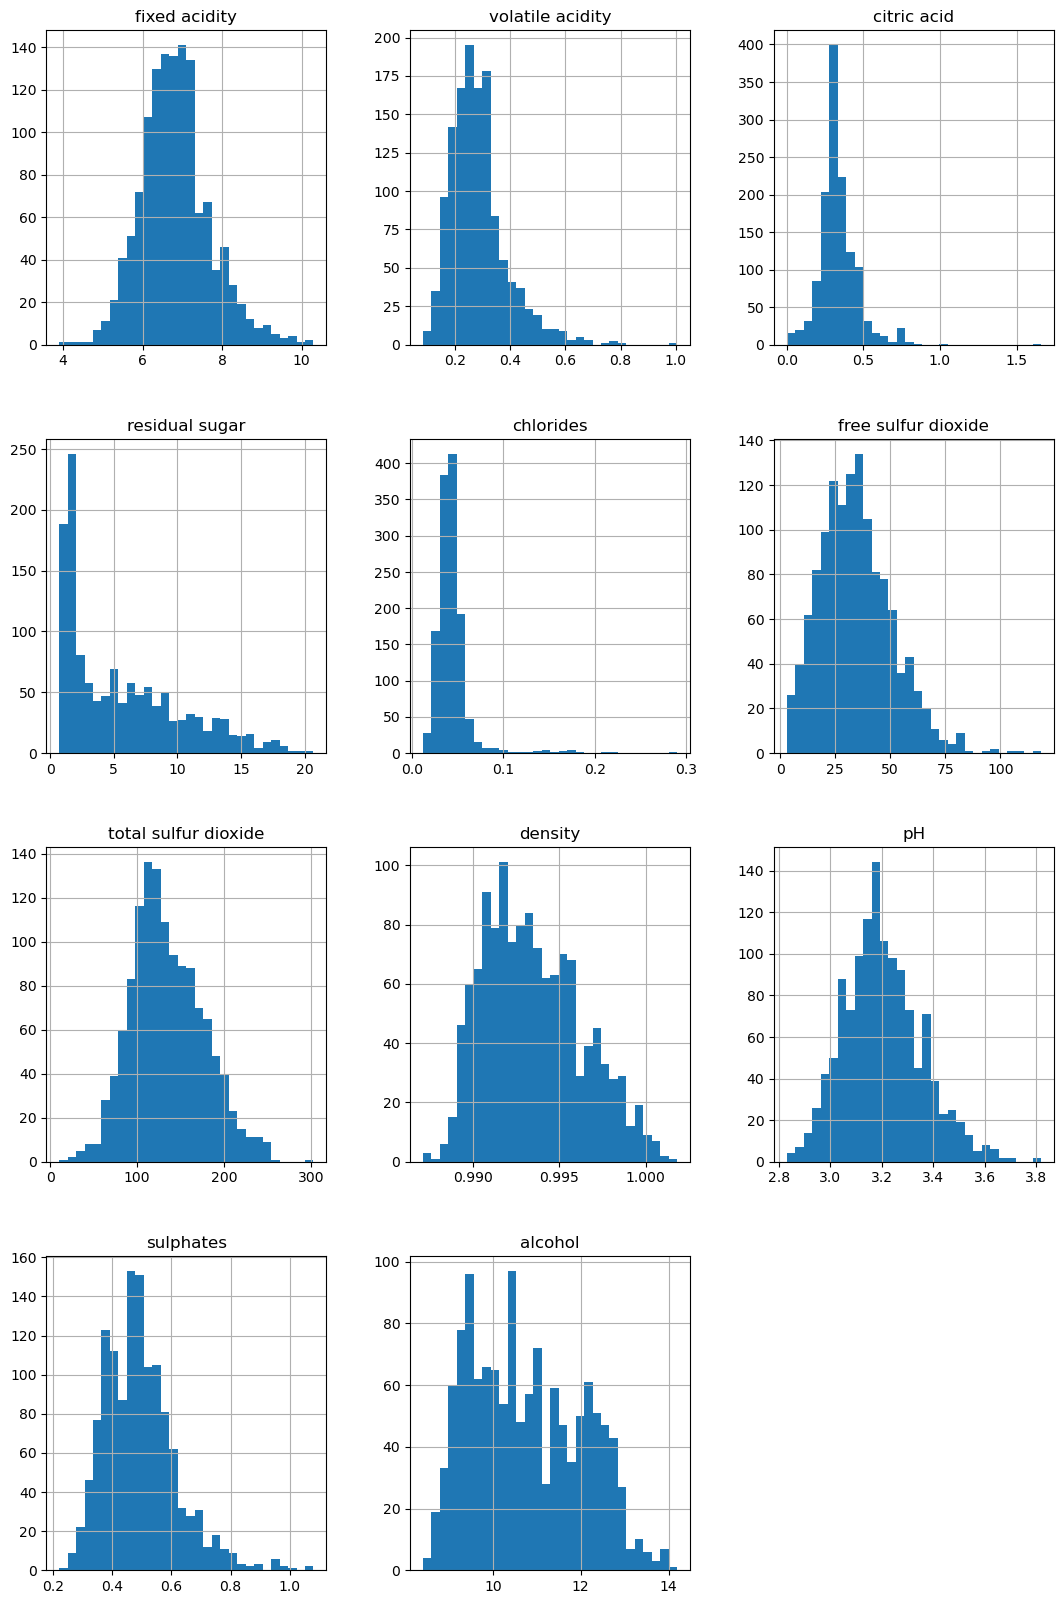

In [973]:
X_train.hist(bins=30, figsize=(13, 20))
plt.show()

In [974]:
display(y_train.value_counts())
#есть дисбаланс классов

0    821
1    472
Name: quality, dtype: int64

In [1077]:
train1=train[train['quality']==0]
train2=train[train['quality']==1]

In [1078]:
Q1 = train1.quantile(0.25)
Q3 = train1.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = ((train1 < lower_bound) | (train1 > upper_bound)).any(axis=1)
train1 = train1[~outlier_mask]

In [ ]:
train_new=pd.concat([train1,train2])

In [1112]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_new.drop('quality',axis=1), train_new.quality, random_state=42)

In [1041]:
y_train2.value_counts()

0    600
1    458
Name: quality, dtype: int64

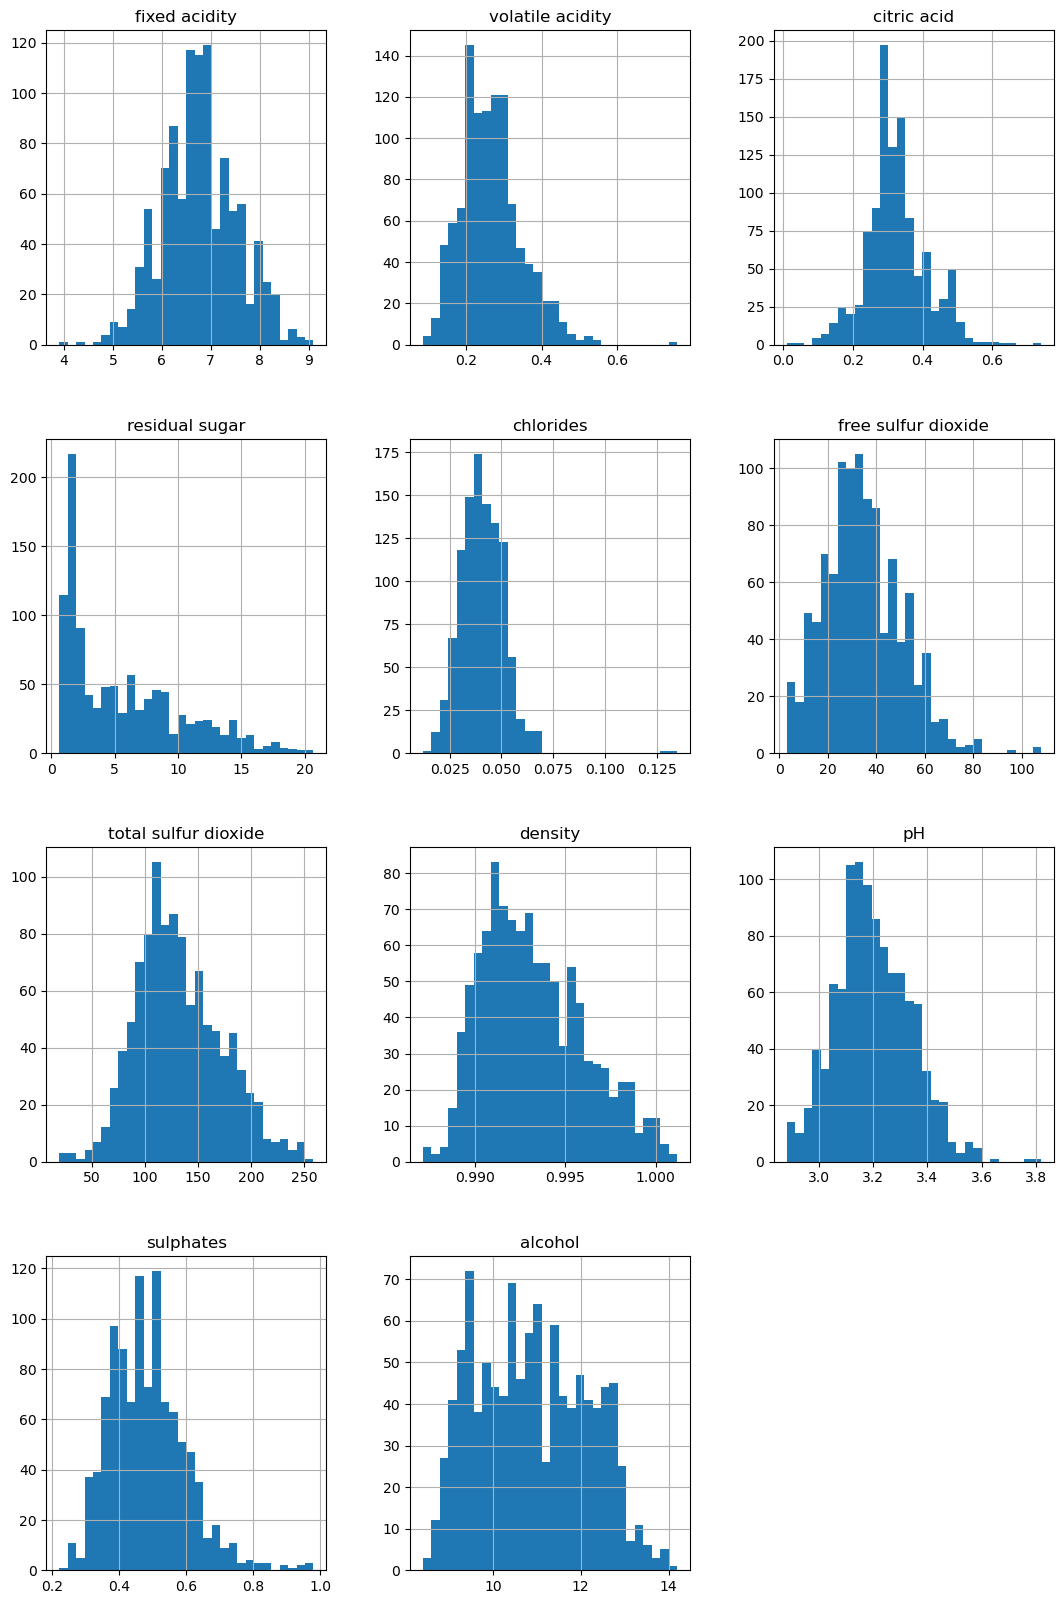

In [980]:
X_train2.hist(bins=30, figsize=(13, 20))
plt.show()

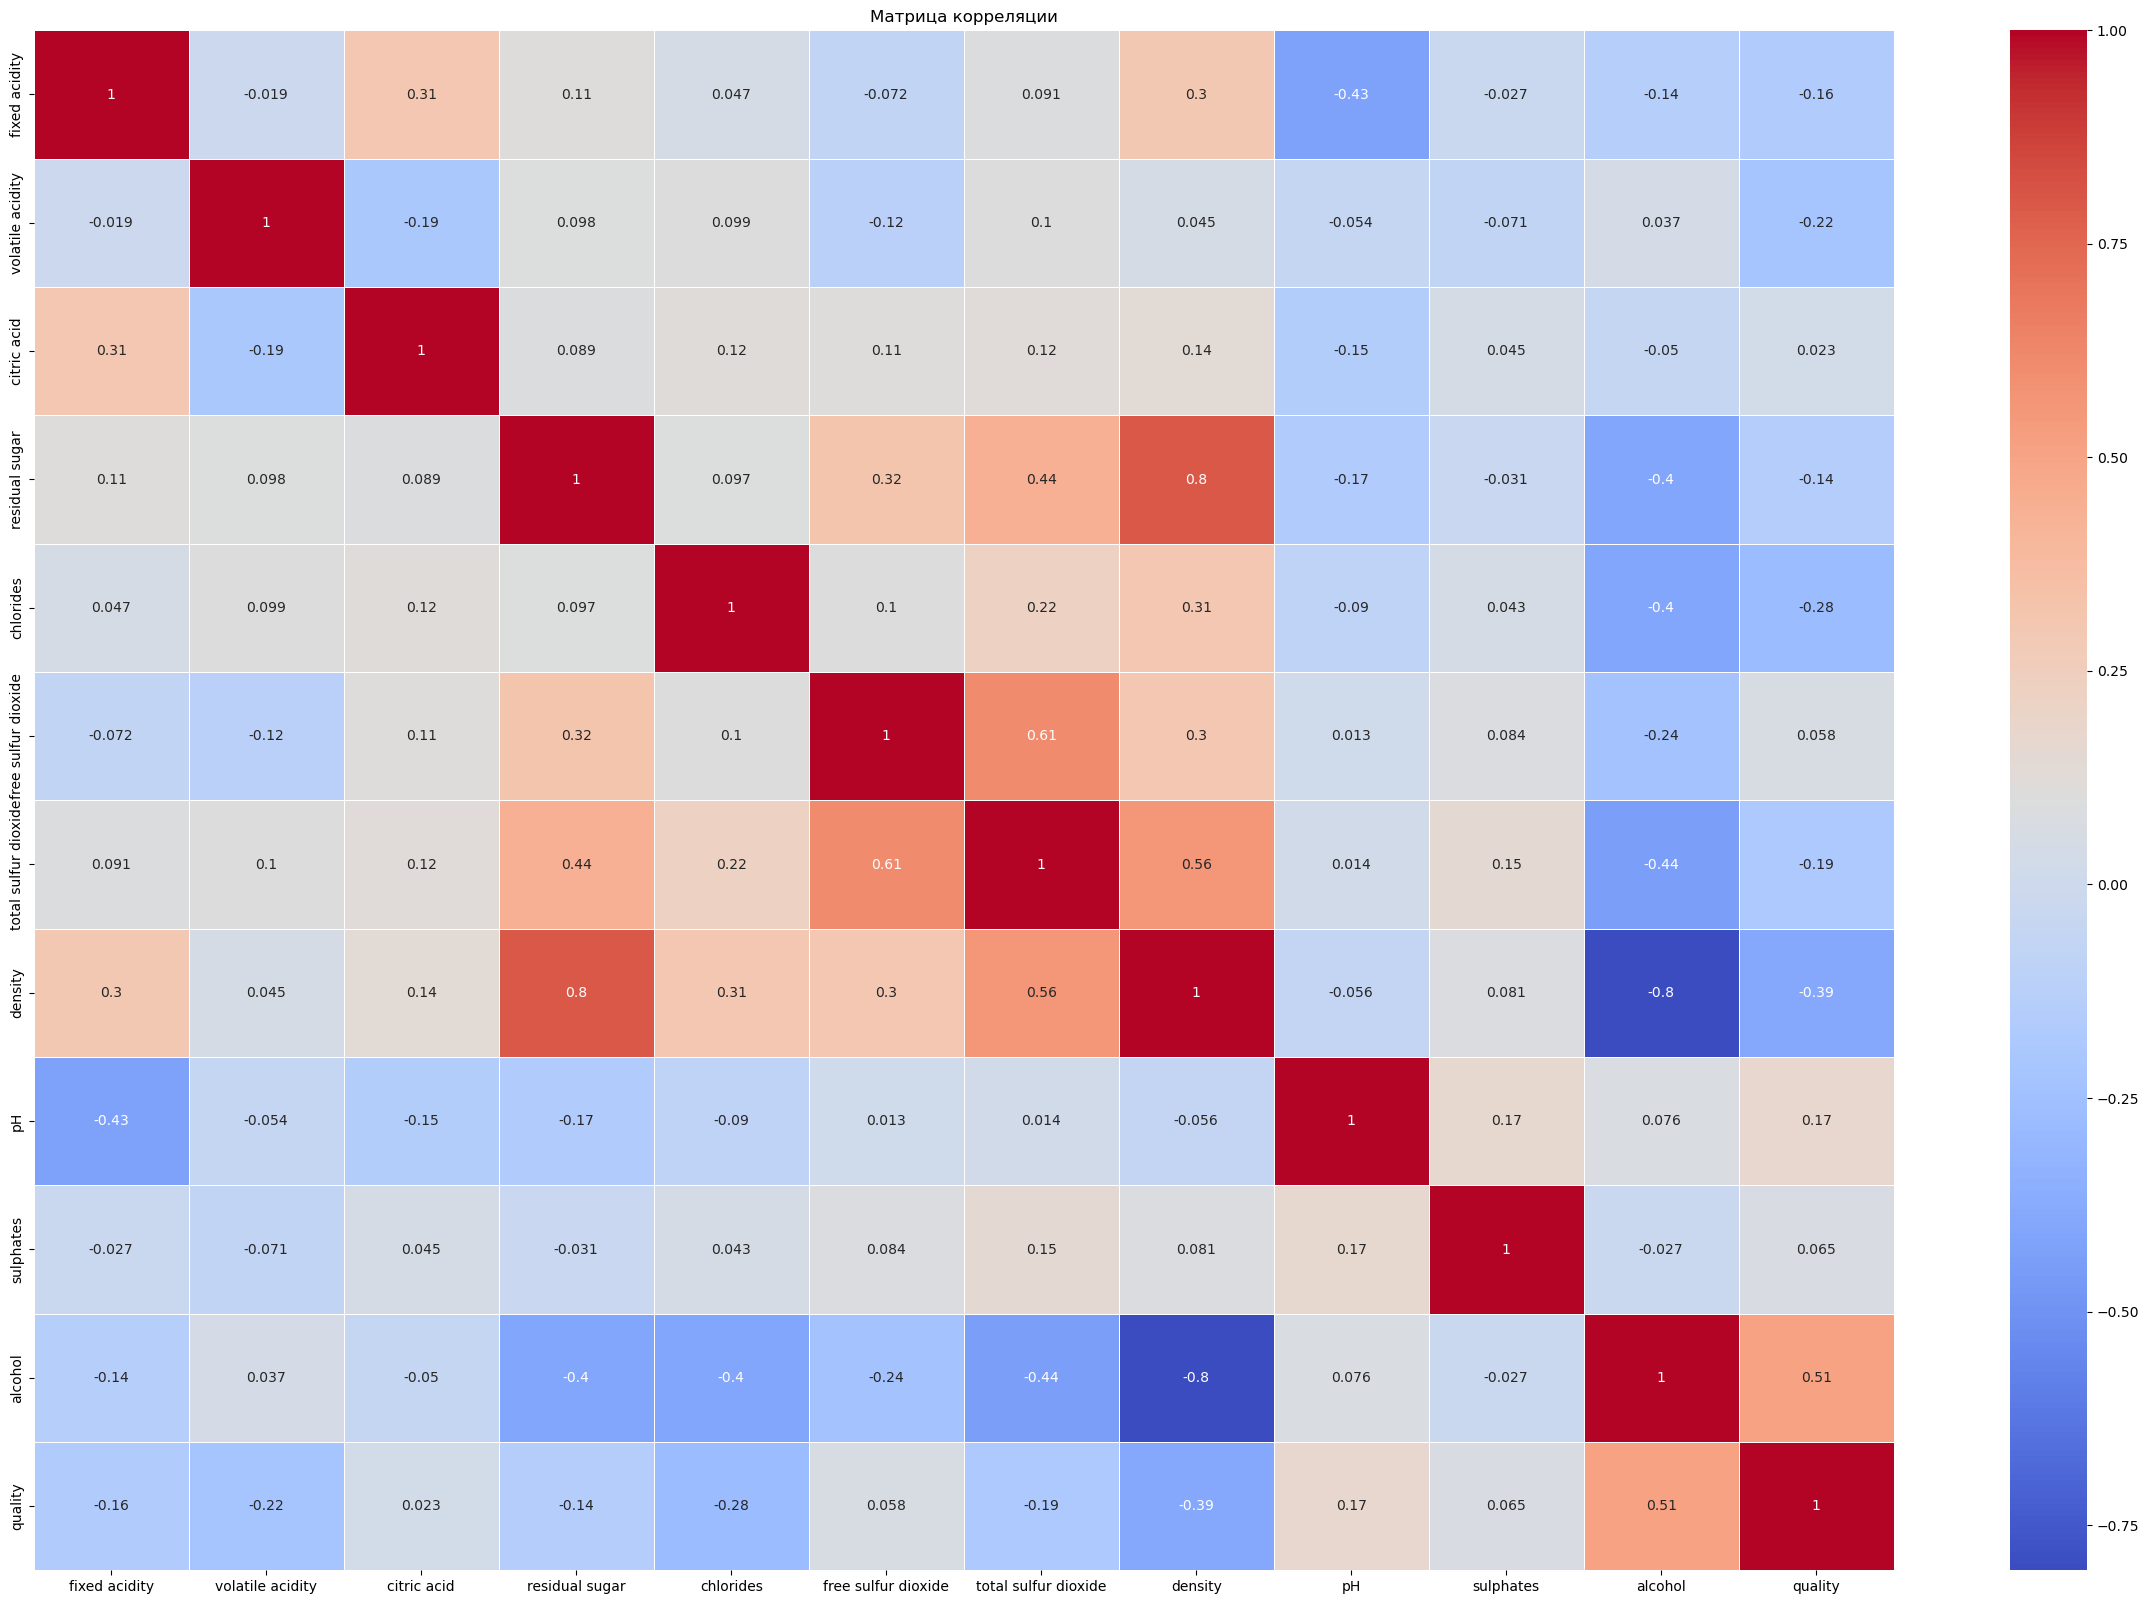

In [6]:
correlation_matrix = train.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

сильной корелляции между признаками очень мало. Убрав density, который имеет сильную корелляцию  с двумя признаками, к успеху не привело

In [ ]:
LogisticRegression на непреобразованных данных

In [997]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',    LogisticRegression(max_iter=1000))])

kfold = KFold(n_splits=10, shuffle=True, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler() ]
param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear'],
    'clf__C': [0.01,0.001,0.1]+list(range(1,100,5))},
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__C': [0.01,0.001,0.1]+list(range(1,100,5))},
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['lbfgs','newton-cg'],},
    ]
#scorer = make_scorer(fbeta_score, beta=0.75)
strat_shuffle_split = StratifiedShuffleSplit(n_splits = 3, random_state = 42)
f=ShuffleSplit(test_size = .3, train_size = .7, n_splits = 5, random_state = 42)
scorer = make_scorer(precision_score, zero_division=0)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring=scorer)
grid.fit(X_train,y_train)
grid.best_params_

{'clf__C': 0.001,
 'clf__penalty': 'l2',
 'clf__solver': 'newton-cg',
 'preprocessing': StandardScaler()}

In [990]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,3,4,5,69,72,75,78,81,84,...,418,419,107,7,77,76,92,2,91,1
mean_fit_time,0.006304,0.000251,0.000754,0.00809,0.03354,0.020066,0.005884,0.009753,0.012963,0.026158,...,0.050798,0.059748,0.010109,0.007447,0.008326,0.006847,0.011044,0.011041,0.008741,0.009358
std_fit_time,0.001896,0.000502,0.000953,0.002465,0.004967,0.000169,0.00407,0.00108,0.00393,0.004248,...,0.006919,0.006256,0.000939,0.003832,0.004393,0.004642,0.00146,0.003712,0.001696,0.001909
mean_score_time,0.003922,0.008865,0.008295,0.002366,0.001513,0.0,0.003911,0.002128,0.001401,0.004005,...,0.003454,0.003597,0.00199,0.004171,0.005983,0.002279,0.002196,0.004736,0.000907,0.001003
std_score_time,0.002314,0.000985,0.000991,0.003315,0.001458,0.0,0.004265,0.003424,0.002803,0.004981,...,0.003335,0.004001,0.003639,0.004595,0.003563,0.003297,0.003269,0.005006,0.001814,0.00149
param_clf__C,0.01,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.001,...,NaN,NaN,0.1,0.1,0.01,0.01,0.001,0.01,0.001,0.01
param_clf__penalty,l1,l1,l1,l1,l2,l2,l2,l2,l2,l2,...,none,none,l2,l1,l2,l2,l2,l1,l2,l1
param_clf__solver,liblinear,liblinear,liblinear,liblinear,newton-cg,lbfgs,liblinear,sag,saga,newton-cg,...,newton-cg,newton-cg,liblinear,liblinear,liblinear,liblinear,liblinear,liblinear,liblinear,liblinear
param_preprocessing,MinMaxScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler()
params,"{'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__s...","{'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__...","{'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__...","{'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__s...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__s...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__s...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__s...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__s...","{'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__...",...,"{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so...","{'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__so...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__s...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__s...","{'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__...","{'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__s...","{'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__...","{'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__s..."
split0_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.714286,0.714286,0.707317,0.705882,0.7125,0.704545,0.705882,0.678161,0.698113,0.68


In [1104]:
pipe = Pipeline([("scaler", StandardScaler()), ("log", LogisticRegression(penalty='l2',C=0.001,solver='newton-cg'))])
pipe.fit(X_train, y_train)
# y_probabilities = pipe.predict_proba(X_test2)[:, 1] 
# y_pred = (y_probabilities >= 0.47).astype(int)
y_pred=pipe.predict(X_test)
print(f"precision: {precision_score(y_test,y_pred)}")

precision: 0.6571428571428571


In [1106]:
print(f"Roc_auc_score: {roc_auc_score(y_test,y_pred)}")
print(f"f1: {f1_score(y_test,y_pred)}")
print(f"recall: {recall_score(y_test,y_pred)}")

Roc_auc_score: 0.5577881023086503
f1: 0.2541436464088398
recall: 0.15753424657534246


LogisticRegression для преобразованных данных

In [1084]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',    LogisticRegression(max_iter=1000))])

kfold = KFold(n_splits=10, shuffle=True, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler() ]
param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear'],
    'clf__C': [0.01,0.001,0.1]+list(range(1,100,5))},
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__C': [0.01,0.001,0.1]+list(range(1,100,5))},
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['lbfgs','newton-cg'],},
    ]
#scorer = make_scorer(fbeta_score, beta=0.75)
strat_shuffle_split = StratifiedShuffleSplit(n_splits = 3, random_state = 42)
f=ShuffleSplit(test_size = .3, train_size = .7, n_splits = 5, random_state = 42)
scorer = make_scorer(precision_score, zero_division=0)
grid = GridSearchCV(pipe, param_grid, cv=10,scoring=scorer)
grid.fit(X_train2,y_train2)
grid.best_params_

{'clf__C': 0.01,
 'clf__penalty': 'l2',
 'clf__solver': 'liblinear',
 'preprocessing': MinMaxScaler()}

In [1107]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("log", LogisticRegression(penalty='l2',C=0.01,solver='liblinear'))])
pipe.fit(X_train2, y_train2)
y_pred=pipe.predict(X_test2)
print(f"precision: {precision_score(y_test2,y_pred)}")

precision: 0.8333333333333334


In [1086]:
cv_scores = cross_val_score(pipe, X_test2, y_test2, cv=10, scoring=make_scorer(precision_score, zero_division=0))
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(cv_scores))

Cross validation scores:
	 0.5000
	1.0000
	0.6667
	0.6250
	0.8571
	1.0000
	0.8333
	0.5000
	1.0000
	1.0000
Mean CV Precision = 0.7982


In [1087]:
print(f"Roc_auc_score: {roc_auc_score(y_test2,y_pred)}")
print(f"f1: {f1_score(y_test2,y_pred)}")
print(f"recall: {recall_score(y_test2,y_pred)}")

Roc_auc_score: 0.5234952864394489
f1: 0.106951871657754
recall: 0.05714285714285714


In [ ]:
KNeighbors для непреобразованных данных

In [1044]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 5,6,10,12,14,15,20,25,30]
p=[1, 2, 4, 6,7,9, 8, 10,12,13,14,15]
weights=['uniform','distance']
scorer = make_scorer(fbeta_score, beta=0.75)
param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights':weights
     }
]
strat_shuffle_split = StratifiedShuffleSplit(n_splits = 3, random_state = 42)
f=ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring='precision')
grid.fit(X_train,y_train)
grid.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=2, p=9),
 'classifier__n_neighbors': 2,
 'classifier__p': 9,
 'classifier__weights': 'uniform',
 'preprocessing': MinMaxScaler()}

In [539]:
#2,8,uniform,minmax
#12,7,uniform,Standa
#2,7,uniform,stand
#2,4,uniform,stand 0.77
#14,3,distance,minmax

In [1049]:
pipe = Pipeline([("scaler",MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=2,p=9,weights='uniform'))])
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
precision_score(y_test, y_pred)

0.7341772151898734

In [1050]:
print(f"Roc_auc_score: {roc_auc_score(y_test,y_pred)}")
print(f"f1: {f1_score(y_test,y_pred)}")
print(f"recall: {recall_score(y_test,y_pred)}")

Roc_auc_score: 0.6619168502730146
f1: 0.5155555555555555
recall: 0.3972602739726027


KNeighbors для преобразованных данных

In [1048]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 5,6,10,12,14,15,20,25,30]
p=[1, 2, 4, 6,7,9, 8, 10,12,13,14,15]
weights=['uniform','distance']
scorer = make_scorer(fbeta_score, beta=0.75)
param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights':weights
     }
]
strat_shuffle_split = StratifiedShuffleSplit(n_splits = 3, random_state = 42)
f=ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring='precision')
grid.fit(X_train2,y_train2)
grid.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=4, p=15),
 'classifier__n_neighbors': 4,
 'classifier__p': 15,
 'classifier__weights': 'uniform',
 'preprocessing': MinMaxScaler()}

In [1052]:
pipe = Pipeline([("scaler",MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=4,p=15,weights='uniform'))])
pipe.fit(X_train2, y_train2)
y_pred=pipe.predict(X_test2)
precision_score(y_test2, y_pred)

0.7520661157024794

In [1053]:
print(f"Roc_auc_score: {roc_auc_score(y_test2,y_pred)}")
print(f"f1: {f1_score(y_test2,y_pred)}")
print(f"recall: {recall_score(y_test2,y_pred)}")

Roc_auc_score: 0.7066547927461141
f1: 0.6476868327402135
recall: 0.56875


Байес

In [1054]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

# n_splits = 5, random_state = 42 дают не улачную комбинацию и это хорошо для разбора ошибок решетки
cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = 5,scoring='precision')
grid.fit(X_train2, y_train2)
grid.best_params_

{'clf': GaussianNB(), 'preprocessing': MinMaxScaler()}

In [1088]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("log", GaussianNB())])
pipe.fit(X_train2, y_train2)
y_pred=pipe.predict(X_test2)
# y_probabilities = pipe.predict_proba(X_test2)[:, 1]
# y_pred = (y_probabilities >= 0.8).astype(int)
precision_score(y_test2, y_pred)

0.65625

In [1089]:
cv_scores = cross_val_score(pipe, X_test, y_test, cv=10, scoring="precision")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(cv_scores))

Cross validation scores:
	 0.6250
	0.5185
	0.5882
	0.5238
	0.4583
	0.5000
	0.6316
	0.7500
	0.5455
	0.5455
Mean CV Precision = 0.5686


In [1057]:
print(f"Roc_auc_score: {roc_auc_score(y_test2,y_pred)}")
print(f"f1: {f1_score(y_test2,y_pred)}")
print(f"recall: {recall_score(y_test2,y_pred)}")

Roc_auc_score: 0.7522506476683937
f1: 0.7365269461077845
recall: 0.76875


Теперь буду максимизировать f1

In [1090]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 5,6,10,12,14,15,19]
p=[1, 2, 4, 6,7,9, 8, 10,12,15]
weights=['uniform','distance']
scorer = make_scorer(fbeta_score, beta=0.75)
param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights':weights
     }
]
strat_shuffle_split = StratifiedShuffleSplit(n_splits = 3, random_state = 42)
f=ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring='f1')
grid.fit(X_train2,y_train2)
grid.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=14, weights='distance'),
 'classifier__n_neighbors': 14,
 'classifier__p': 2,
 'classifier__weights': 'distance',
 'preprocessing': MinMaxScaler()}

In [1118]:
pipe = Pipeline([("scaler",MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=14,p=3,weights='distance'))])
pipe.fit(X_train2, y_train2)
y_pred=pipe.predict(X_test2)
precision_score(y_test2, y_pred)

0.7702702702702703

In [1121]:
cv_scores = cross_val_score(pipe, X_test2, y_test2, cv=10, scoring="precision")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(cv_scores))

Cross validation scores:
	 0.6923
	0.6667
	0.8462
	0.6471
	0.7059
	0.7143
	0.6154
	0.6842
	0.7778
	0.8000
Mean CV Precision = 0.7150


In [1119]:
print(f"Roc_auc_score: {roc_auc_score(y_test2,y_pred)}")
print(f"f1: {f1_score(y_test2,y_pred)}")
print(f"recall: {recall_score(y_test2,y_pred)}")

Roc_auc_score: 0.7394198694706309
f1: 0.7058823529411764
recall: 0.6514285714285715


In [1122]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',    LogisticRegression(max_iter=1000))])

kfold = KFold(n_splits=10, shuffle=True, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler() ]
param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear'],
    'clf__C': [0.01,0.001,0.1]+list(range(1,100,5))},
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__C': [0.01,0.001,0.1]+list(range(1,100,5))},
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['lbfgs','newton-cg'],},
    ]
#scorer = make_scorer(fbeta_score, beta=0.75)
strat_shuffle_split = StratifiedShuffleSplit(n_splits = 3, random_state = 42)
f=ShuffleSplit(test_size = .3, train_size = .7, n_splits = 5, random_state = 42)
grid = GridSearchCV(pipe, param_grid, cv=10,scoring='f1')
grid.fit(X_train2,y_train2)
grid.best_params_

{'clf__C': 0.001,
 'clf__penalty': 'l2',
 'clf__solver': 'liblinear',
 'preprocessing': StandardScaler()}

In [1123]:
pipe = Pipeline([("scaler", StandardScaler()), ("log", LogisticRegression(penalty='l2',C=0.001,solver='liblinear'))])
pipe.fit(X_train2, y_train2)
y_pred=pipe.predict(X_test2)
print(f"precision: {precision_score(y_test2,y_pred)}")

precision: 0.6906077348066298


In [1124]:
print(f"Roc_auc_score: {roc_auc_score(y_test2,y_pred)}")
print(f"f1: {f1_score(y_test2,y_pred)}")
print(f"recall: {recall_score(y_test2,y_pred)}")

Roc_auc_score: 0.7150108774474258
f1: 0.702247191011236
recall: 0.7142857142857143
